In [1]:
from Learning_Agent import *
from Clairvoyant_non_stationary import *
from EXP3 import *
from CUSUM import *
from FIFO import *
from Non_Stationary_Class_1 import *
from Non_Stationary_Env import *
from UCB1_active import *
from UCB1_non_stationary_passive import *
import Functions as f
import Plots as p
import matplotlib.pyplot as plt

In [2]:
p1=[[0.8,0.7,0.4,0.2,0.1],
   [0.3,0.3,0.4,0.6,0.7],
   [0.6,0.7,0.8,0.4,0.2],
]

c1=(3,85,10000)

cum1=700


classes= Non_Stationary_Class_1(p1 ,c1 ,cum1,3)

In [3]:
env=Non_Stationary_Env(5,100,365,classes)
pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)

In [12]:
pricing_arms=[10,15,20,25,30]

# Creation of the UCB1
e=EXP3(pricing_arms, 0.01)

In [5]:
import random

In [13]:
for i in range(200):
    a=e.pull_arm()
    e.update(a,60000)
    if(i>10):
        print(e.weights)
        print(e.probabilities)

[ 5.60040721  2.26304765  7.71168406 15.29076773  1.        ]
[0.20041994 0.08217877 0.27522155 0.40475018 0.03742956]
[11.07499278  2.26304765  7.71168406 15.29076773  1.        ]
[0.1759917  0.07230765 0.24158418 0.47704878 0.03306769]
[11.07499278  2.26304765 13.79033854 15.29076773  1.        ]
[0.29562877 0.06199967 0.20645813 0.40740066 0.02851277]
[ 11.07499278   2.26304765  13.79033854  15.29076773 126.28160999]
[0.25452092 0.05359975 0.31643352 0.35064481 0.024801  ]
[ 11.07499278   2.26304765  13.79033854  56.56596399 126.28160999]
[0.06699226 0.01528042 0.08292693 0.09173202 0.74306836]
[ 11.07499278   2.26304765  13.79033854  56.56596399 154.3752419 ]
[0.05421666 0.01266987 0.06701904 0.26869866 0.59739577]
[ 11.07499278   2.26304765  13.79033854  56.56596399 185.99742706]
[0.04805478 0.01141077 0.05934641 0.23722662 0.64396142]
[ 11.07499278   2.26304765  13.79033854  56.56596399 221.6222065 ]
[0.04265472 0.01030732 0.05262236 0.20964558 0.68477001]
[ 11.07499278   2.26304

ValueError: probabilities contain NaN

In [32]:
runs=20
T=365

cum_regret_exp3_multi=[]
cum_reward_exp3_multi=[]
istant_regret_exp3_multi=[]
istant_reward_exp3_multi=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)



for r in range(runs):
    # Creation of the UCB1
    exp3=EXP3(pricing_arms, 0.01)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,1,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_exp3=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_exp3=[0]
    regret_exp3=np.zeros(T)
    reward_exp3=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=exp3.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        
        print(reward[2])
        
        exp3.update(played_price,reward[2])
    
        cum_reward_exp3.append(cum_reward_exp3[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_exp3.append(cum_regret_exp3[t-1]+(expected_optimal_rew-reward[2]))
        reward_exp3[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_exp3[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_exp3_multi.append(cum_regret_exp3)
    cum_reward_exp3_multi.append(cum_reward_exp3)
    istant_regret_exp3_multi.append(regret_exp3)
    istant_reward_exp3_multi.append(reward_exp3)

44489.44803162076
45149.218221054536
98836.16401741124
44418.79927792178
98583.5470313976
98290.51413852535
44971.872100167086
26221.961543174453
98536.38777179545
25172.20423220778
98675.0864900947
98515.9879912097
26401.55163385009
99886.10169912831
98524.25046316348
98432.5156763378
97671.77678094187
98989.80226133038
99713.71977557121
99326.66807492122
98736.74890442072
97838.19419457365
98612.98892210482
99059.72448980372
98742.16994159546
98370.02420366347
99569.0225269848
98278.41677526309
98912.13836876806
97910.57090867625
99077.33753088939
99376.59478506741
98966.27015964458
98270.9932195183
99883.81746978752
99373.12666952319
97998.31905545302
98061.29082062028
99085.1081486525
97967.22095832766
97576.86522240809
99119.16740698289
99238.09135921854
45235.592216079815
99761.85846360525
43718.56560839678
99274.61044636542
97905.36875156552
98468.93616086165
97782.07974673357
98585.61733709669
99013.22750887678
99429.80938841838
98609.03510131068
98537.75666855268
98973.6140157

c:\Users\vargu\OneDrive\Documenti\universita\Studio\python\Project\OLA\EXP3.py:20: RuntimeWarning: overflow encountered in double_scalars
  self.weights[self.arms_indexing[chosen_arm]]=np.exp((estimated_reward)/self.n_arms)*self.weights[self.arms_indexing[chosen_arm]]
c:\Users\vargu\OneDrive\Documenti\universita\Studio\python\Project\OLA\EXP3.py:18: RuntimeWarning: invalid value encountered in divide
  self.probabilities = (1-self.exploration_param)*(self.weights/sum_weights) + (self.exploration_param/self.n_arms)


ValueError: probabilities contain NaN

In [21]:
runs=20
T=365

cum_regret_exp3_multi1=[]
cum_reward_exp3_multi1=[]
istant_regret_exp3_multi1=[]
istant_reward_exp3_multi1=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)



for r in range(runs):
    # Creation of the UCB1
    exp3=EXP3(pricing_arms, 1)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,1,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_exp3=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_exp3=[0]
    regret_exp3=np.zeros(T)
    reward_exp3=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=exp3.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        
        print(reward[2])
        
        exp3.update(played_price,reward[2])
    
        cum_reward_exp3.append(cum_reward_exp3[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_exp3.append(cum_regret_exp3[t-1]+(expected_optimal_rew-reward[2]))
        reward_exp3[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_exp3[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_exp3_multi1.append(cum_regret_exp3)
    cum_reward_exp3_multi1.append(cum_reward_exp3)
    istant_regret_exp3_multi1.append(regret_exp3)
    istant_reward_exp3_multi1.append(reward_exp3)

45387.731271694065
98766.38787202517
44366.14129286871
76122.74671658558
73812.99755555291
74888.69803550001
25006.170634352187
25529.24638459877
74259.11145974057
44741.361846366424
100696.4543681919
45987.08868557437
45967.755418403125
74840.80813293264
25473.204174628125
23633.8202271688
74062.91980749618
98434.14119286845
73232.45502979847
44019.8541283712
45444.3374451958
71948.49034732403
74801.75513325962
44235.530090165164
98485.07617137392
24970.90654892735
73186.70609490262
44283.508128966685
74465.17088206229
74171.96495341774
98571.89649109697
73562.76865439539
99487.56932300015
74045.63827384054
44335.16716664282
44420.24700249838
23928.94488267753
72681.79779693266
75785.83649398379
45462.52979137215
74396.01189432705
45469.86973017078
97672.47325525939
99052.16121966924
74184.7285497658
45670.44328786571
74014.69202395227
99532.13019724662
99237.62908542075
73648.94525274745
73861.09314684651
98962.51611355405
46297.13835222198
44096.967735326754
74517.05870028114
99233.

In [22]:
runs=20
T=365

cum_regret_exp3_multi2=[]
cum_reward_exp3_multi2=[]
istant_regret_exp3_multi2=[]
istant_reward_exp3_multi2=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)



for r in range(runs):
    # Creation of the UCB1
    exp3=EXP3(pricing_arms, 0.5)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,1,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_exp3=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_exp3=[0]
    regret_exp3=np.zeros(T)
    reward_exp3=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=exp3.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        
        print(reward[2])
        
        exp3.update(played_price,reward[2])
    
        cum_reward_exp3.append(cum_reward_exp3[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_exp3.append(cum_regret_exp3[t-1]+(expected_optimal_rew-reward[2]))
        reward_exp3[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_exp3[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_exp3_multi2.append(cum_regret_exp3)
    cum_reward_exp3_multi2.append(cum_reward_exp3)
    istant_regret_exp3_multi2.append(regret_exp3)
    istant_reward_exp3_multi2.append(reward_exp3)

99262.3432723421
45338.18979085238
74254.64081424431
99517.51243066142
74432.3195528474
74308.49453150327
75128.60040420164
73927.79831284641
73878.13838723897
74002.55777721775
42891.48395927198
98748.53538950806
98882.0590126921
74207.33078598873
74423.81667615531
74339.84083145374
43808.33939480636
97881.23350348475
25614.0237613425
74396.29200221256
97884.10877966296
99473.49222851015
73993.59193287972
74597.2203380709
98647.35236648133
74458.74353022268
47242.75648007831
98382.83037502039
74235.37780888533
99006.68213724533
45290.66549698165
25463.163705289197
75053.58574833741
74856.99934876355
26337.031566638547
74573.0225151107
98183.22276157117
24584.479268467774
99991.01498167422
99186.92358604922
24788.516673458365
25478.936582937175
47170.59440371456
73514.9700598339
74335.42644742854
74918.2926619264
24786.14909324627
76284.36001825852
44322.625617510916
74476.96800606955
74970.1411906413
97864.05401549417
99534.27929284585
99102.1542720919
45032.683294494185
97502.4261299

In [23]:
runs=20
T=365

cum_regret_exp3_multi3=[]
cum_reward_exp3_multi3=[]
istant_regret_exp3_multi3=[]
istant_reward_exp3_multi3=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)



for r in range(runs):
    # Creation of the UCB1
    exp3=EXP3(pricing_arms, 0.8)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,1,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_exp3=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_exp3=[0]
    regret_exp3=np.zeros(T)
    reward_exp3=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=exp3.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        
        print(reward[2])
        
        exp3.update(played_price,reward[2])
    
        cum_reward_exp3.append(cum_reward_exp3[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_exp3.append(cum_regret_exp3[t-1]+(expected_optimal_rew-reward[2]))
        reward_exp3[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_exp3[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_exp3_multi3.append(cum_regret_exp3)
    cum_reward_exp3_multi3.append(cum_reward_exp3)
    istant_regret_exp3_multi3.append(regret_exp3)
    istant_reward_exp3_multi3.append(reward_exp3)

73838.08412949825
44191.629756768416
99421.91091316077
74799.32895054342
46586.52357245857
73676.6446565568
97548.27713747387
45980.43787981942
73829.79315377552
73213.28878435545
25572.251571737434
24230.128788026337
45744.12198263779
25829.087751962576
23979.79629964949
98258.0975344402
98117.49305316989
44560.05591404772
74055.02990265912
43875.8689022641
44247.370419702886
25423.49596977249
44863.87816644469
100014.30789185109
99189.1491588415
73360.12385500006
45385.404637772524
43521.11318554358
43378.796217414594
74860.91793410554
75775.81753889033
99113.13118582206
99635.85527371884
100209.68815284767
44682.05354964663
73170.81438023296
97740.14142408776
74372.50370334084
42770.86698405965
25343.09391690883
73620.4159436178
45263.109896855
73434.8488165893
97113.70099148828
98351.57124090023
43587.05722654936
73375.91832921108
44480.593096199314
100101.95214140545
98907.98041394561
74092.45225504374
24840.853630545495
24430.353378792493
97729.91611194228
97787.84592229537
44924

In [24]:
runs=20
T=365

cum_regret_exp3_multi4=[]
cum_reward_exp3_multi4=[]
istant_regret_exp3_multi4=[]
istant_reward_exp3_multi4=[]

pricing_arms=[10,15,20,25,30]

advertising_arms=range(300,301)



for r in range(runs):
    # Creation of the UCB1
    exp3=EXP3(pricing_arms, 1)
    
    # Creation of the enviroment
    env=Non_Stationary_Env(5,1,T,classes)
    
    # Creation of Clairvoyants
    pricing_clairv=Clairvoyant_pricing_non_stationary(env, (1,1) ,pricing_arms )  
    advertising_clairv=Clairvoyant_bid_non_stationary(env , (1,1) , advertising_arms)
    
    cum_reward_exp3=[0]
    clairvoyant_cum_reward=[0]
    cum_regret_exp3=[0]
    regret_exp3=np.zeros(T)
    reward_exp3=np.zeros(T)
    istant_optimal_rew=np.zeros(T)

    
    for t in range(T):
        
        # Play the best pricing_arm
        played_price=exp3.pull_arm()
        
        # Compute the optimal pricing arm using clairvoyant
        optimal_price=pricing_clairv.optimal_arm()
        
        
        
        # Compute the optimal bid given the played and given the optimal price
        played_bid=advertising_clairv.optimal_arm(played_price)
        optimal_bid=advertising_clairv.optimal_arm(optimal_price)
        
        #print(t,played_price , optimal_price)
        # Collect rewards
        
        expected_optimal_rew=advertising_clairv.expected_reward(optimal_bid ,optimal_price)
    
        reward=env.round(played_price , played_bid)
        
        print(reward[2])
        
        exp3.update(played_price,reward[2])
    
        cum_reward_exp3.append(cum_reward_exp3[t-1]+reward[2])
        clairvoyant_cum_reward.append(clairvoyant_cum_reward[t-1]+expected_optimal_rew)
        cum_regret_exp3.append(cum_regret_exp3[t-1]+(expected_optimal_rew-reward[2]))
        reward_exp3[t]=reward[2]
        istant_optimal_rew[t]=expected_optimal_rew
        regret_exp3[t]=expected_optimal_rew-reward[2]
        
        
    cum_regret_exp3_multi4.append(cum_regret_exp3)
    cum_reward_exp3_multi4.append(cum_reward_exp3)
    istant_regret_exp3_multi4.append(regret_exp3)
    istant_reward_exp3_multi4.append(reward_exp3)

73805.91862773779
73667.3746882312
74385.80136688596
73043.68874533894
72896.31591998544
97602.7200947246
98027.5690895053
25927.37312377181
76647.5418683319
44829.93022246505
97809.49728435682
72864.5828011188
74613.00251293505
74302.27046227302
99489.77454289724
98787.10949221846
73493.60105264197
25047.802887244485
25760.415069693616
74676.82905812182
76263.32181686642
74118.75795884621
74568.07603485434
98044.21471238742
74512.5686903243
44977.71578798606
74641.88164646052
74405.0911399368
73821.40955605835
73789.61516603749
74580.9416135057
74773.23784885014
73519.45176163194
24236.84113048991
44000.865028134656
26138.281895693544
43716.52070809725
45267.41482972829
25640.554466752084
99913.18830571177
74502.01121566017
74053.27817187543
24532.140535624963
74543.75223640041
44724.082965080335
44429.66174327434
73907.37926421473
98734.23685589981
74637.33047676198
97960.6824921529
98979.7831012973
97054.67353908447
73569.29951294266
44503.41849506802
98940.73071407288
73896.8382444

In [25]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.stats import norm

In [26]:
def plot_comparison_multi(x, arr1, arr2, arr3, arr4 , arr5,name1,name2, name3,name4,name5,yname):
    y1 = np.mean(arr1,axis=0)
    y2 = np.mean(arr2,axis=0)
    y3 = np.mean(arr3,axis=0)
    y4 = np.mean(arr4,axis=0)
    y5 = np.mean(arr5,axis=0)
    
    
    var1 = np.var(arr1,axis=0)
    std1=np.sqrt(var1)
    quantile_up1 = norm.ppf(0.975 , y1 , std1)

    quantile_down1 = norm.ppf(0.025 , y1 , std1)

    # Plot the line
    plt.plot(x, y1, color='red', label=name1)

    # Plot the upper confidence bound
    plt.fill_between(x, quantile_down1, quantile_up1, color='red', alpha=0.5, label='95% confidence bound')
    
        
    var2 = np.var(arr2,axis=0)
    std2=np.sqrt(var2)
    quantile_up2 = norm.ppf(0.975 , y2 , std2)

    quantile_down2 = norm.ppf(0.025 , y2 , std2)

    # Plot the line
    plt.plot(x, y2, color='green', label=name2)

    # Plot the upper confidence bound
    plt.fill_between(x, quantile_down2, quantile_up2, color='green', alpha=0.5, label='95% confidence bound')
    
    var3 = np.var(arr3,axis=0)
    std3=np.sqrt(var3)
    quantile_up3 = norm.ppf(0.975 , y3 , std3)

    quantile_down3 = norm.ppf(0.025 , y3 , std3)

    # Plot the line
    plt.plot(x, y3, color='blue', label=name3)

    # Plot the upper confidence bound
    plt.fill_between(x, quantile_down3, quantile_up3, color='blue', alpha=0.5, label='95% confidence bound')
    
    
    var4 = np.var(arr4,axis=0)
    std4=np.sqrt(var4)
    quantile_up4 = norm.ppf(0.975 , y4 , std4)

    quantile_down4 = norm.ppf(0.025 , y4 , std4)

    # Plot the line
    plt.plot(x, y4, color='yellow', label=name4)

    # Plot the upper confidence bound
    plt.fill_between(x, quantile_down4, quantile_up4, color='yellow', alpha=0.5, label='95% confidence bound')
    
    
    var5 = np.var(arr5,axis=0)
    std5=np.sqrt(var5)
    quantile_up5 = norm.ppf(0.975 , y5 , std5)

    quantile_down5 = norm.ppf(0.025 , y5 , std5)

    # Plot the line
    plt.plot(x, y5, color='orange', label=name5)

    # Plot the upper confidence bound
    plt.fill_between(x, quantile_down5, quantile_up5, color='orange', alpha=0.5, label='95% confidence bound')

    # Add labels and legend
    plt.xlabel('time istant')
    plt.ylabel(yname)
    plt.legend()

    # Show the plot
    plt.show()

In [27]:
x=[]
for i in range(len(cum_regret_exp3_multi[0])):
    x.append(i)

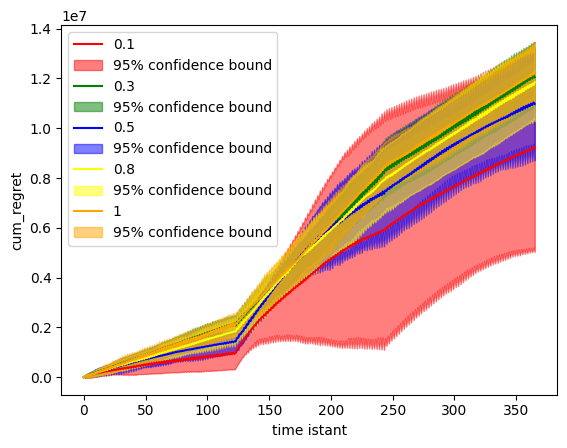

In [30]:
plot_comparison_multi(x,cum_regret_exp3_multi,cum_regret_exp3_multi1,cum_regret_exp3_multi2,cum_regret_exp3_multi3,cum_regret_exp3_multi4,"0.1","0.3","0.5","0.8","1","cum_regret")

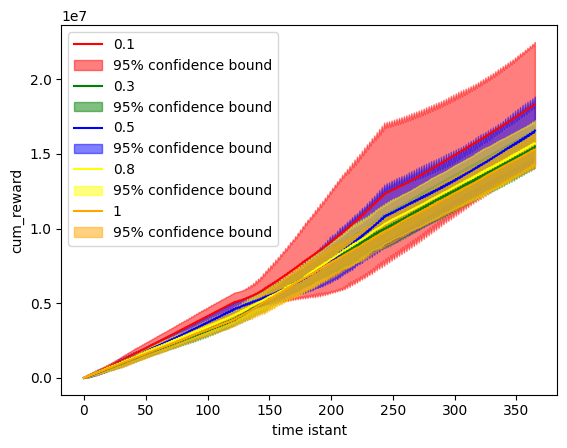

In [31]:
plot_comparison_multi(x,cum_reward_exp3_multi,cum_reward_exp3_multi1,cum_reward_exp3_multi2,cum_reward_exp3_multi3,cum_reward_exp3_multi4,"0.1","0.3","0.5","0.8","1","cum_reward")